In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import planarity_criterion as pc 
import printers as printers
import numpy as np

planarity_crit = pc.PlanarityCriterion()
printer = printers.Printer()
tcc_printer = printers.ConnectedComponentsDrawer()

In [3]:
# 🎲 Generate a random seed  ### interesting seeds: 3244861328
seed = random.randint(0, 2**32 - 1)
print("Using seed:", seed)

# 🌱 Seed NumPy’s RNG
np.random.seed(seed)

Using seed: 1471228073


Seed:  1966


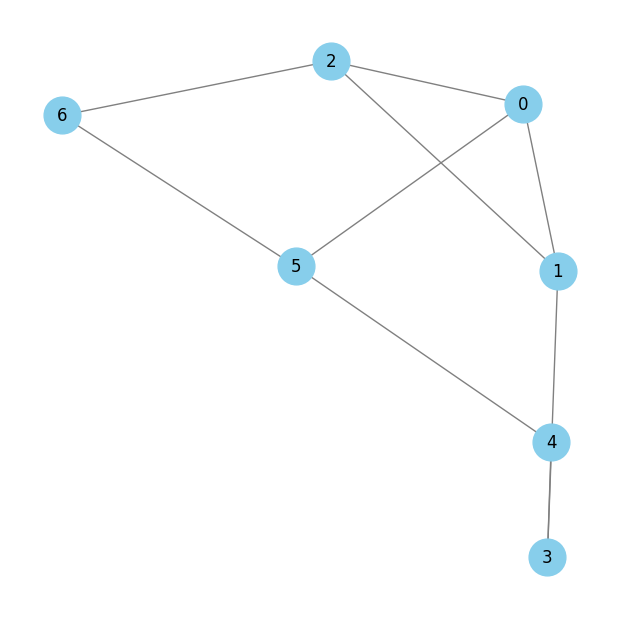

In [4]:
### CREATE A RANDOM GRAPH G ###


# Generate a random seed first
seed_value = 1966#random.randint(0, 10000)  # Random seed between 0 and 10000
random.seed(seed_value)
print("Seed: ", seed_value)

# Parameters
n = 7 # Number of nodes
p = 0.35 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

In [5]:
planar, info = planarity_crit.is_planar(G)
print("Correct result: ", nx.is_planar(G) == planar)

Correct result:  True


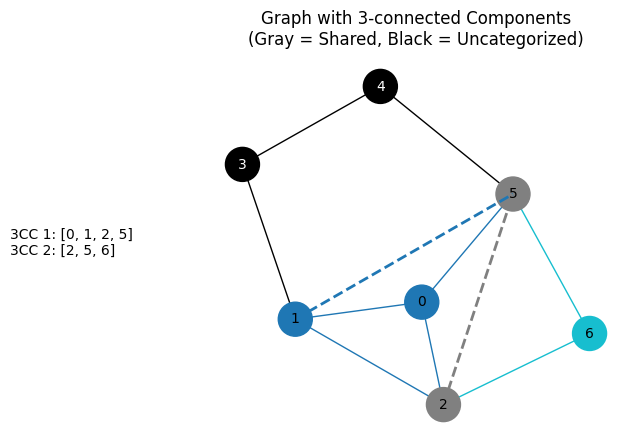

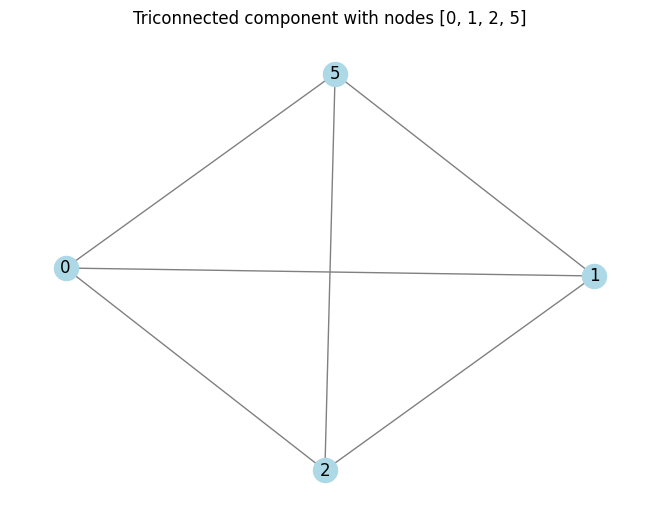

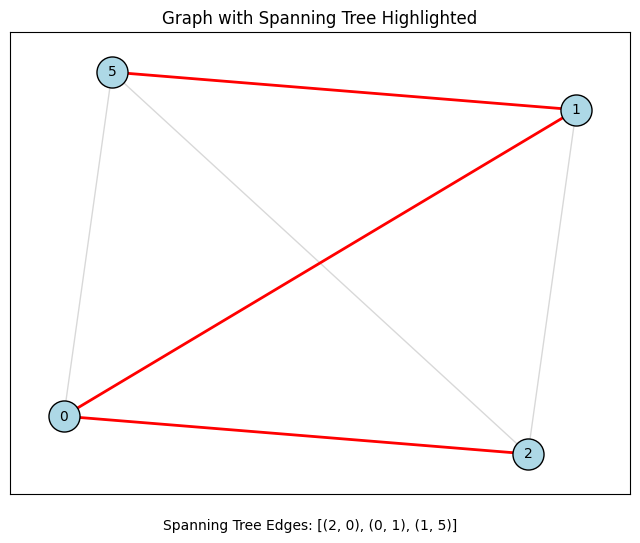

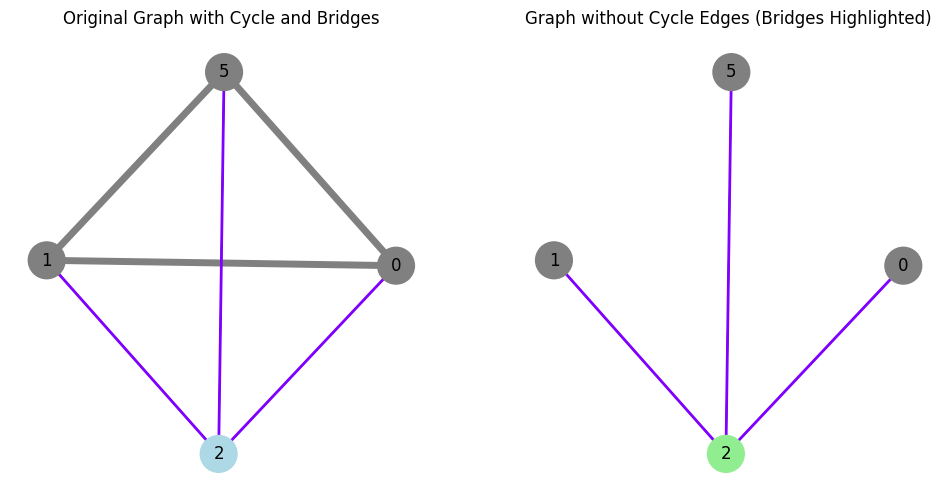

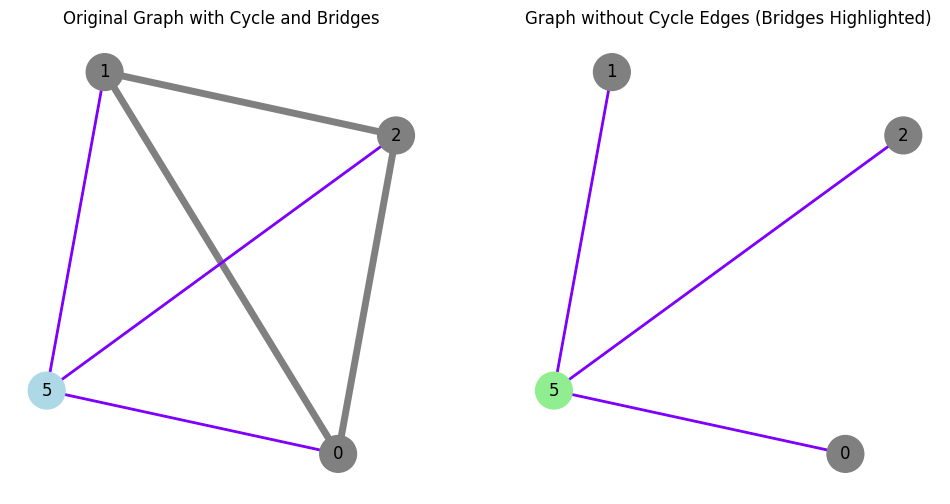

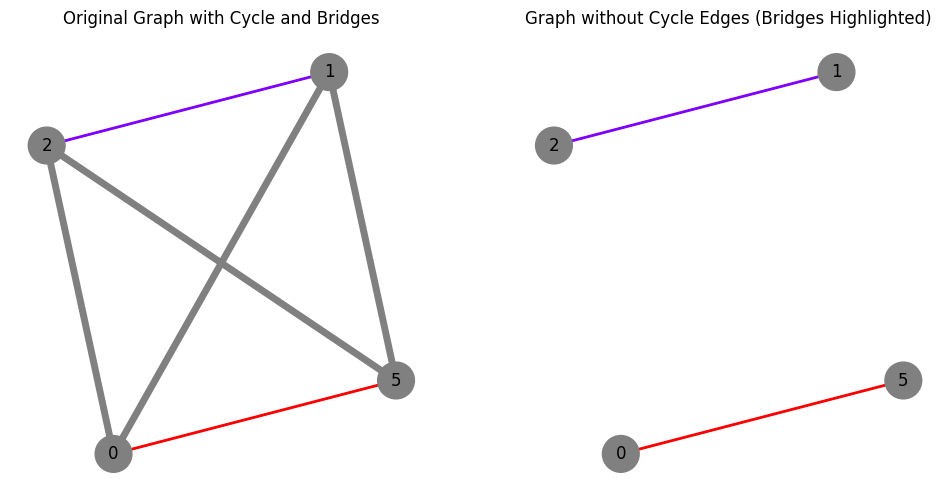

Cycle/Edge       (1, 0)  (2, 0)  (5, 0)  (2, 1)  (5, 1)  (5, 2)  
-----------------------------------------------------------------
(0, 1, 5, 0)     True    False   True    False   True    False   
(1, 0, 2, 1)     True    True    False   True    False   False   
(2, 0, 1, 5, 2)  True    True    True    False   True    True    

A1 matrix:
    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 0| 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1| 0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  1  1  0  0  1  0  0  0
 2| 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 3| 0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  1  1  0  0  1  0  0  0
 4| 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

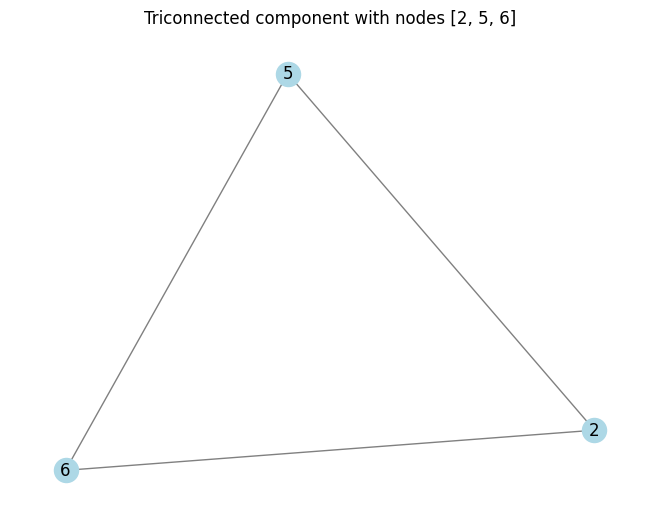

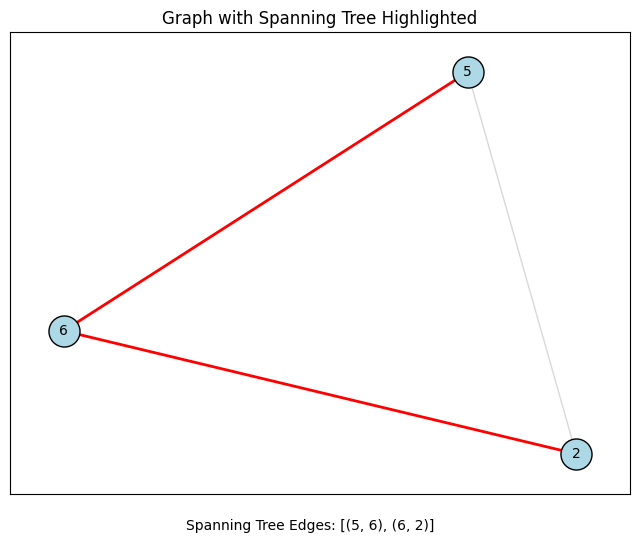

No bridges found for cycle: [2, 6, 5, 2]
Cycle/Edge    (6, 2)  (5, 2)  (6, 5)  
--------------------------------------
(2, 6, 5, 2)  True    True    True    

A1 matrix:
    0  1  2  3  4  5
 0| 1  0  0  0  0  0
 1| 0  1  0  0  0  0
 2| 0  0  1  0  0  0
 3| 0  0  0  1  0  0
 4| 0  0  0  0  1  0
 5| 0  0  0  0  0  1

B1 matrix:
    0  1  2  3  4  5
 0| 0  -  -  -  -  -
 1| -  0  -  -  -  -
 2| -  -  0  -  -  -
 3| -  -  -  0  -  -
 4| -  -  -  -  0  -
 5| -  -  -  -  -  0
--------------------------------------------------------------------------------------------------------------------------------------------




In [6]:
def get_graph_tcc(tcc_list, G):
    tcc = G.subgraph(tcc_list["node_list"]).copy()
    # Add virtual edges to each tcc
    tcc.add_edges_from(tcc_list["virtual_edges"])
    return tcc

def draw_graph(G, title="Graph"):
    pos = nx.spring_layout(G)  # or use nx.planar_layout(G) for planar graphs
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(title)
    plt.show()


tcc_printer.print_n_connected_components(G, info["TCCs"], N=3, name="Triconnected components" )

for i, tcc_list in enumerate(info["TCCs"]):
    tcc = get_graph_tcc(tcc_list, G)
    tcc_info = info["planarity_info"][i]
    draw_graph(tcc, title="Triconnected component with nodes " + str(tcc.nodes()) )
    printer.print_spanning_tree(tcc, tcc_info["spanning_tree"])
    printer.print_bridges(tcc, tcc_info["bridges"])
    printers.Printer.print_cycle_edge_table(tcc_info["truth_assign"], tcc_info["edge_index_map"], tcc_info["cycle_index_map"])
    printers.Printer.print_B_matrix(tcc_info["A1"], "A1 matrix")
    printers.Printer.print_B_matrix(tcc_info["B1"], "B1 matrix")
    print("--------------------------------------------------------------------------------------------------------------------------------------------")
    print()
    print()

In [7]:
print(info)

{'relation_T': [[(0, 1, 2), (0, 1, 5), (0, 2, 5), (1, 2, 5), (2, 5, 6)]], 'relation_R': [[[True, True, True, False, False, True, False], [True, True, True, True, False, True, False], [True, True, True, False, False, True, True], [False, True, False, True, True, False, False], [False, False, False, True, True, True, False], [True, True, True, False, True, True, True], [False, False, True, False, False, True, True]]], 'connected_components': [{(1, 4): {0: 0, 2: 0, 5: 0, 6: 0, 3: 1}, (1, 5): {0: 0, 2: 0, 6: 0, 3: 1, 4: 1}, (2, 5): {0: 0, 1: 0, 3: 0, 4: 0, 6: 1}, (3, 5): {0: 0, 1: 0, 2: 0, 6: 0, 4: 1}}], 'sep_pairs': [[(1, 4), (1, 5), (2, 5), (3, 5)]], 'TCCs': [{'node_list': frozenset({0, 1, 2, 5}), 'virtual_edges': [(1, 5), (2, 5)]}, {'node_list': frozenset({2, 5, 6}), 'virtual_edges': [(2, 5)]}], 'planarity_info': [{'A1': [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [8]:
print(info["planarity_info"])

[{'A1': [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [